## Business Problem

## Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')
import pandas_profiling
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,plot_roc_curve
plt.style.use('ggplot')
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Moudles related to feature selection
from sklearn.feature_selection import RFE,SelectKBest,f_classif

## Create UDFs

In [2]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

## Importing the Data

In [3]:
df = pd.read_csv('E:/DataTrained/Intership_Flip Robo/final_projects/Census_Income.csv')
pd. set_option('display.max_columns', 700)
pd.set_option('display.width', 100)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Inspection

In [4]:
#profile = pandas_profiling.ProfileReport(df)
#profile.to_widgets()

In [5]:
# data informatiion
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 32560 entries, 0 to 32559

Data columns (total 15 columns):

 #   Column          Non-Null Count  Dtype 

---  ------          --------------  ----- 

 0   Age             32560 non-null  int64 

 1   Workclass       32560 non-null  object

 2   Fnlwgt          32560 non-null  int64 

 3   Education       32560 non-null  object

 4   Education_num   32560 non-null  int64 

 5   Marital_status  32560 non-null  object

 6   Occupation      32560 non-null  object

 7   Relationship    32560 non-null  object

 8   Race            32560 non-null  object

 9   Sex             32560 non-null  object

 10  Capital_gain    32560 non-null  int64 

 11  Capital_loss    32560 non-null  int64 

 12  Hours_per_week  32560 non-null  int64 

 13  Native_country  32560 non-null  object

 14  Income          32560 non-null  object

dtypes: int64(6), object(9)

memory usage: 3.7+ MB


In [6]:
# shape 
df.shape

(32560, 15)

##### Dataset has 32560 rows and 15 columns

In [7]:
# Check null values in  data
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

##### There are no Null values

In [8]:
df.isin(['NAN','NA','N/A','-',' ',np.nan]).sum().any()

False

In [9]:
# Value counts for every feature to check the missing again or unique values
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')

36    898

31    888

34    886

23    877

35    876

     ... 

83      6

88      3

85      3

86      1

87      1

Name: Age, Length: 73, dtype: int64

**********************************

 Private             22696

 Self-emp-not-inc     2541

 Local-gov            2093

 ?                    1836

 State-gov            1297

 Self-emp-inc         1116

 Federal-gov           960

 Without-pay            14

 Never-worked            7

Name: Workclass, dtype: int64

**********************************

164190    13

203488    13

123011    13

148995    12

126675    12

          ..

325573     1

140176     1

318264     1

329205     1

257302     1

Name: Fnlwgt, Length: 21647, dtype: int64

**********************************

 HS-grad         10501

 Some-college     7291

 Bachelors        5354

 Masters          1723

 Assoc-voc        1382

 11th             1175

 Assoc-acdm       1067

 10th              933

 7th-8th           646

 Prof-school       576

 9th          

In [10]:
# Check imbalance of the target data
df.Income.value_counts(normalize=True)

 <=50K    0.759183
 >50K     0.240817
Name: Income, dtype: float64

##### We have Imbalanced data. So we can use Smote to balance the data later before modeling.

In [11]:
# split train data to continous and categorical varaiables.
num=df.select_dtypes(include=['float64','int64'])
cat=df.select_dtypes(include=['object'])

In [12]:
# Descriptive analysis for continous data
num.apply(continuous_var_summary)

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
N,3.256000e+04,3.256000e+04,32560.000000,3.256000e+04,3.256000e+04,3.256000e+04
NMISS,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
SUM,1.256218e+06,6.179296e+09,328224.000000,3.508715e+07,2.842700e+06,1.316644e+06
MEAN,3.858163e+01,1.897818e+05,10.080590,1.077615e+03,8.730651e+01,4.043747e+01
MEDIAN,3.700000e+01,1.783630e+05,10.000000,0.000000e+00,0.000000e+00,4.000000e+01
STD,1.364064e+01,1.055498e+05,2.572709,7.385403e+03,4.029661e+02,1.234762e+01
VAR,1.860671e+02,1.114075e+10,6.618831,5.454418e+07,1.623817e+05,1.524637e+02
MIN,1.700000e+01,1.228500e+04,1.000000,0.000000e+00,0.000000e+00,1.000000e+00
P1,1.700000e+01,2.718577e+04,3.000000,0.000000e+00,0.000000e+00,8.000000e+00
P5,1.900000e+01,3.945860e+04,5.000000,0.000000e+00,0.000000e+00,1.800000e+01


##### Most features are skewed except Education_nym
##### A lot of zeros values in Capital gain and loss

In [13]:
# Descriptive analysis for categorical data
cat.describe(include='O')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [14]:
# Education_num is another number class for Education, i'll drop it 

num.drop('Education_num',axis = 1,inplace =True)
df.drop('Education_num',axis = 1,inplace =True)

In [15]:
#replacing preschool to 12th to "School"

df['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School',inplace =True)
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 School           4253
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
Name: Education, dtype: int64

In [16]:
#Replacing '?' with mode value. for  the below features. 

df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [17]:
# drop both features capital_loss or capital_gain they have alot of zeros values ()>91%)
df.drop(['Capital_loss','Capital_gain'],axis=1,inplace=True)

In [18]:
# shoaw df
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


## EDA

#### --Univariate analysis--

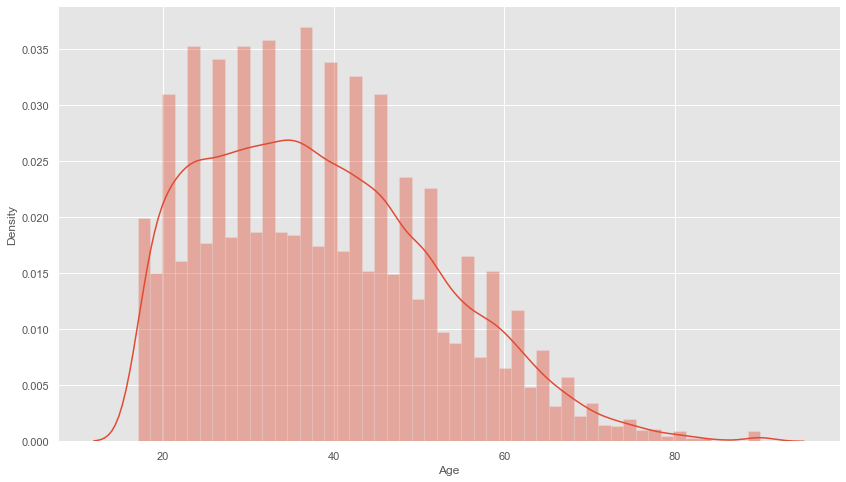

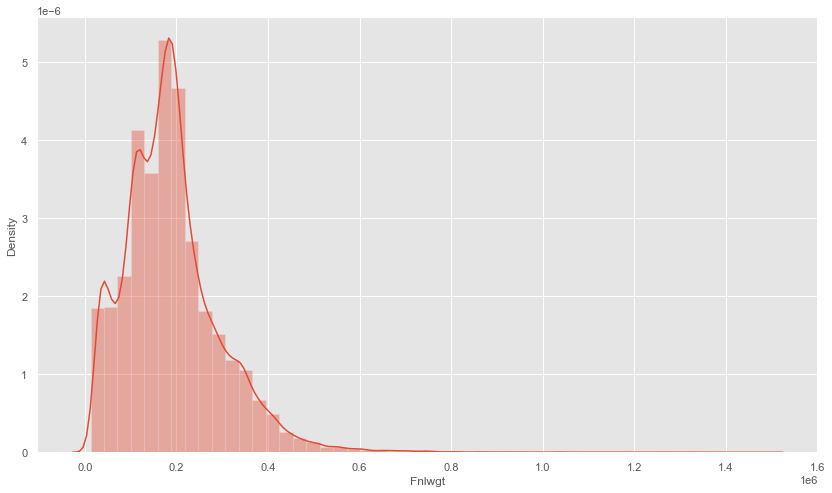

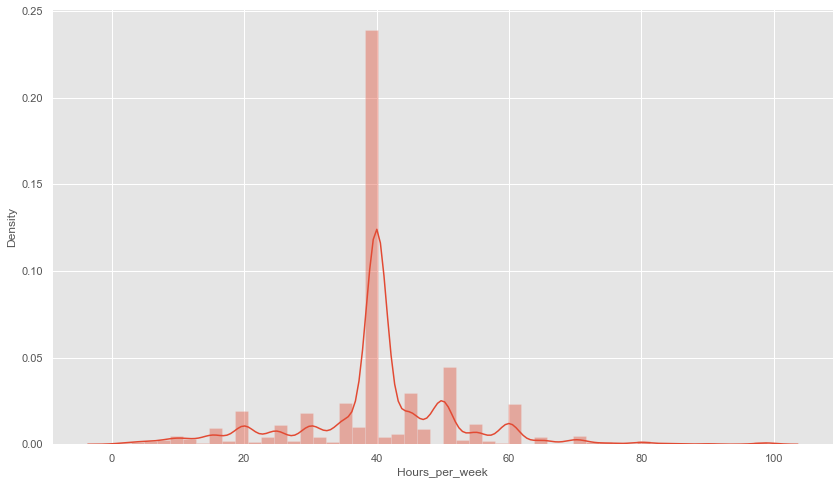

In [19]:
# Check Normality of continous data
for i in num.columns.difference(['Capital_loss','Capital_gain']):
    plt.figure(figsize=(14,8))
    sns.distplot(df[i])
    plt.show()

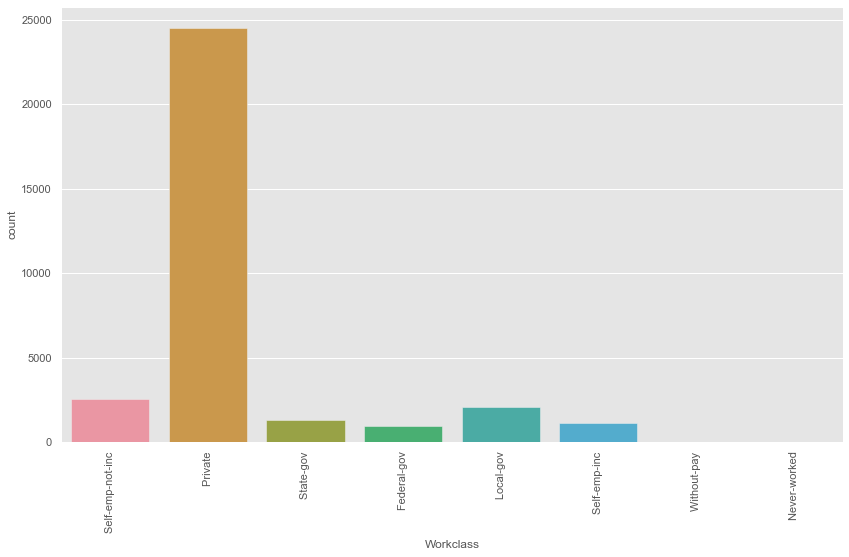

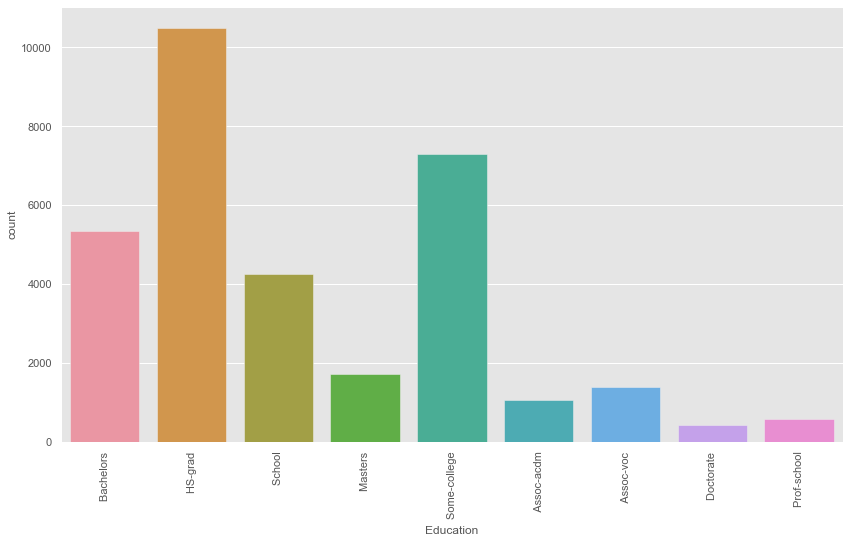

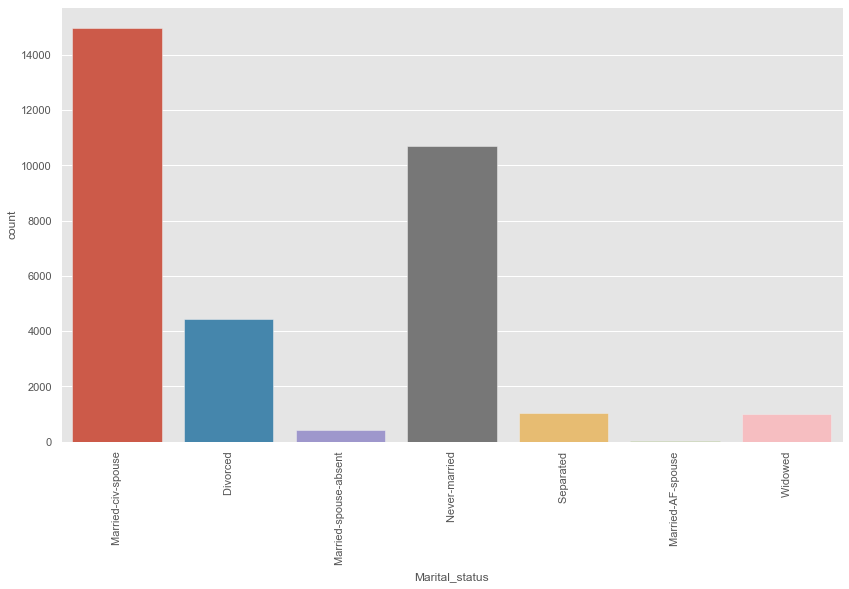

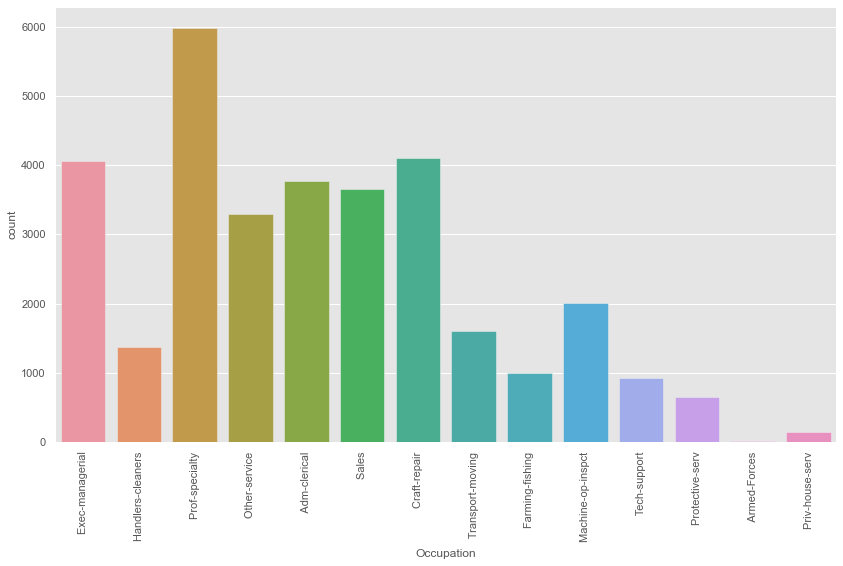

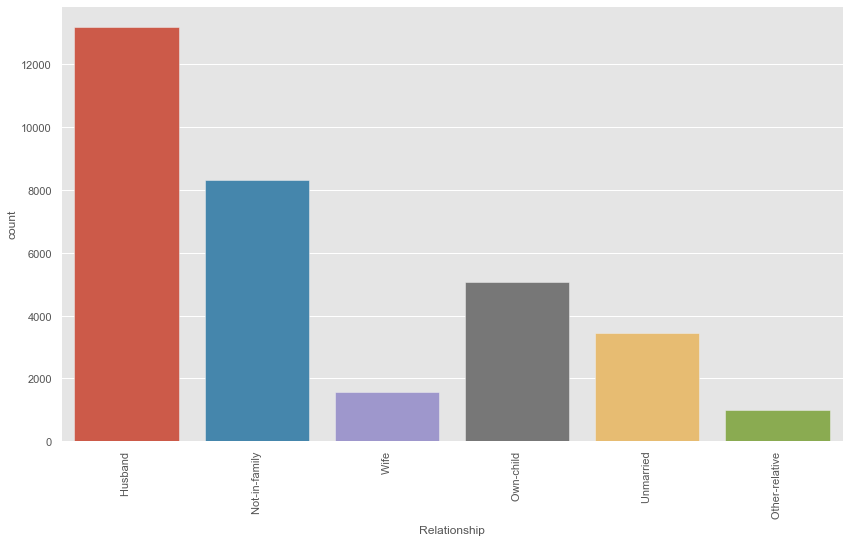

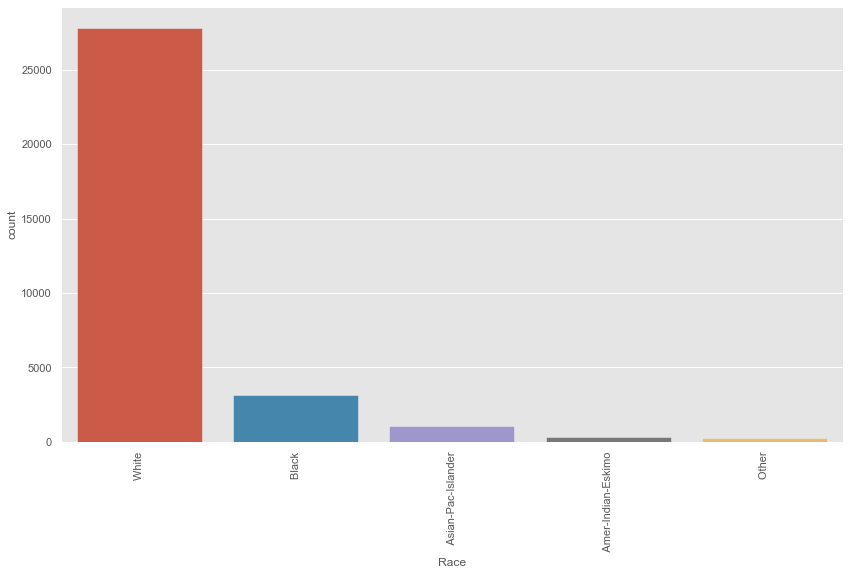

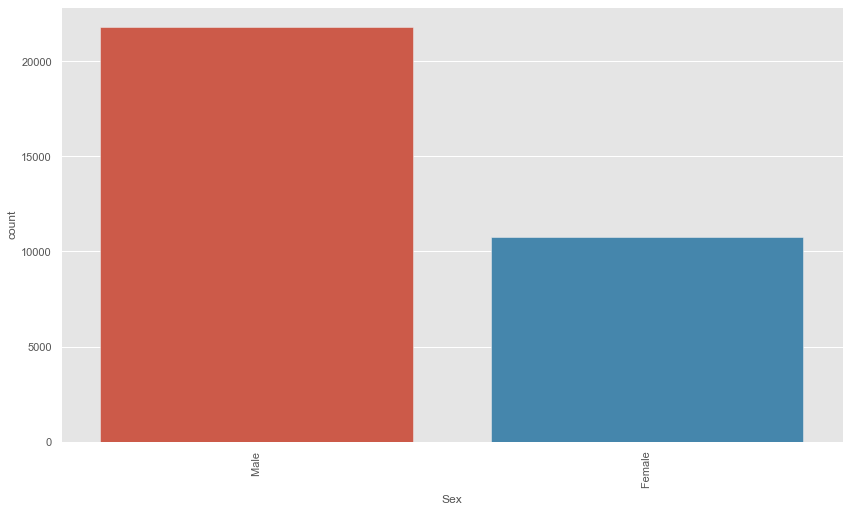

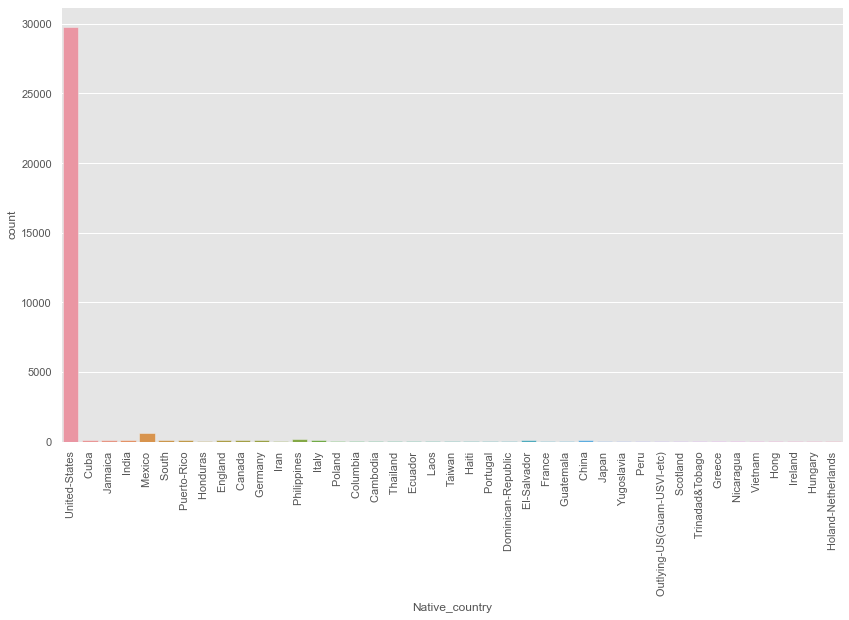

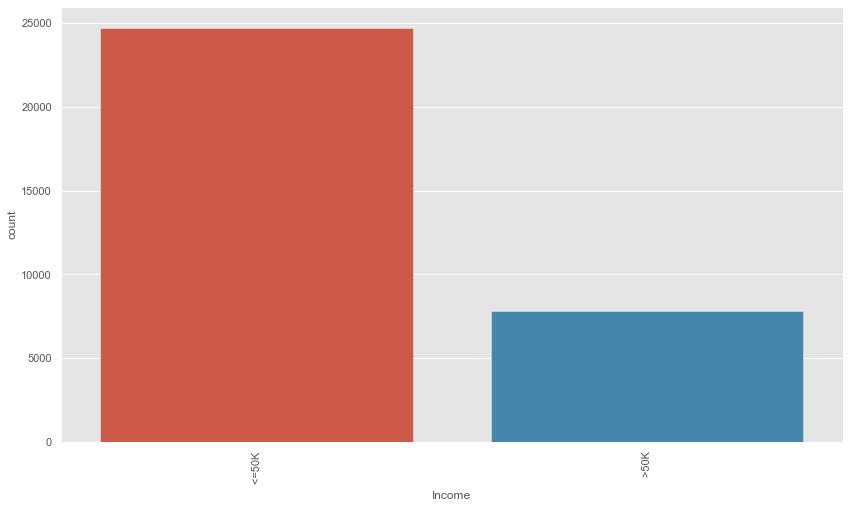

In [20]:
# Check count of categorical data
for i in cat.columns:
    plt.figure(figsize=(14,8))
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### --Bivariate analysis--

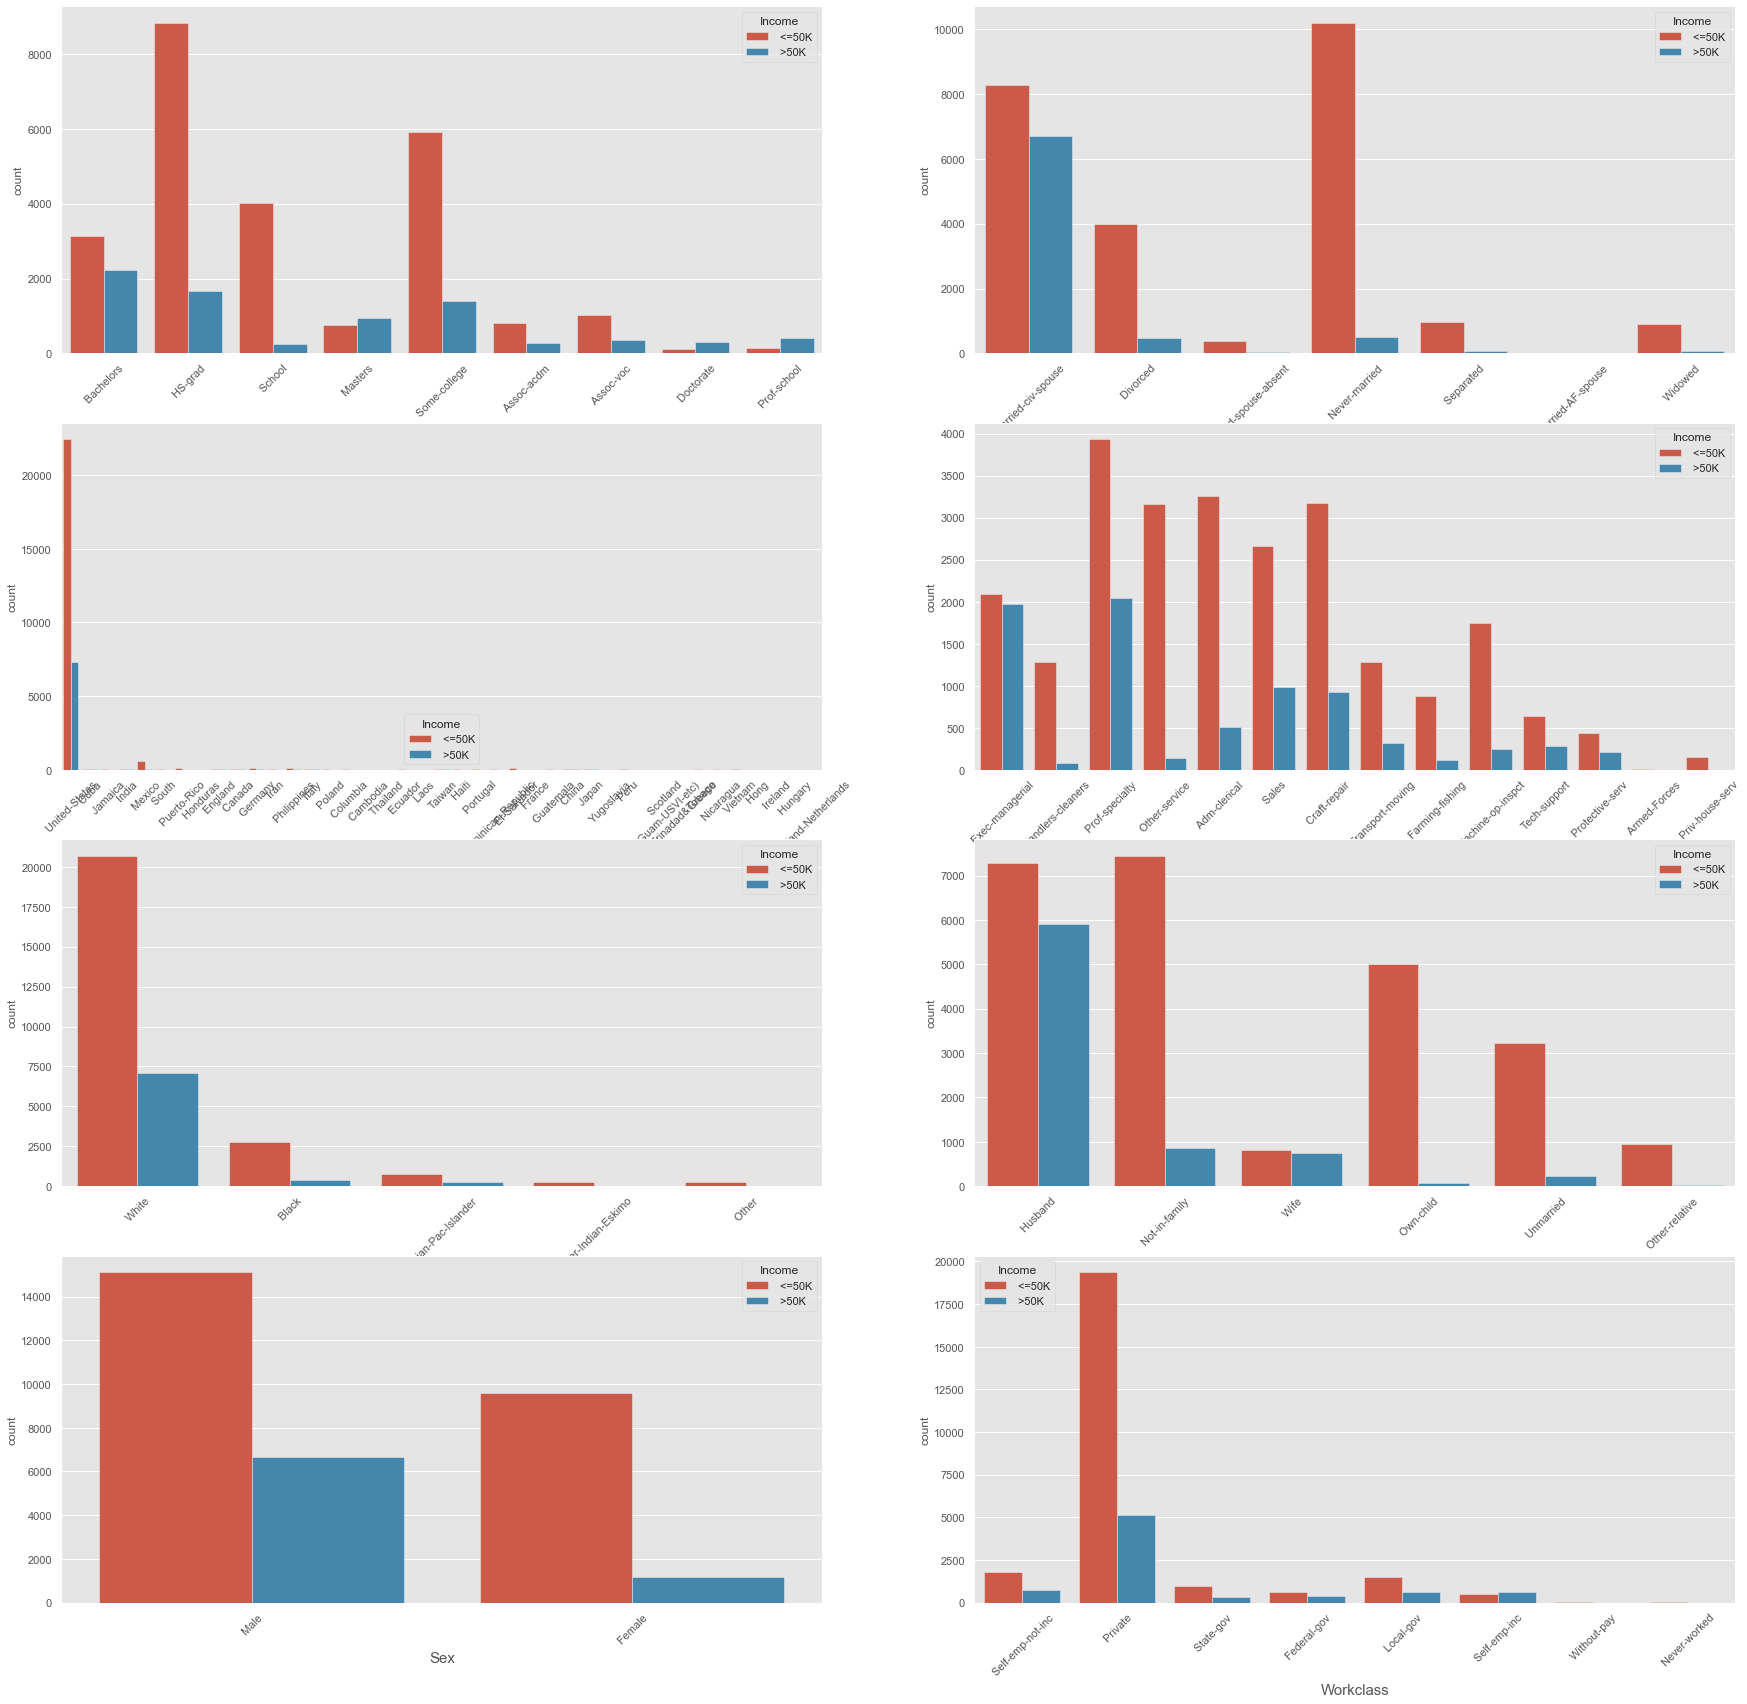

In [21]:
# Categorical variables Vs Target feature (Income)
plt.figure(figsize=(30,60), facecolor='white')
plotnumber = 1

for i in cat.columns.difference(['Income']):
    if plotnumber<=24 :
        ax = plt.subplot(8,2,plotnumber)
        sns.countplot(x=df[i],hue=df.Income)
        plt.xlabel(i,fontsize=15)
        plt.xticks(rotation=45)
       
    plotnumber+=1
plt.show()

In [1]:
# We will use scatterplot.

#sns.catplot(x = 'Relationship', y = 'Age', hue = 'Income', kind = "swarm", data=df, split=True)
#plt.show()

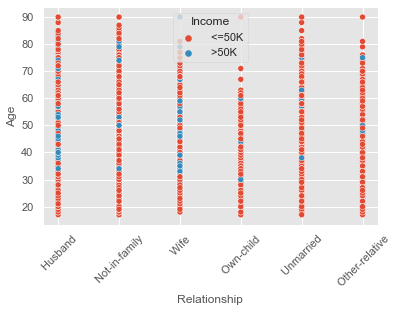

In [23]:
# Relationship and age with the target feature.
sns.scatterplot(x = 'Relationship', y = 'Age', hue = 'Income',data=df)
plt.xticks(rotation=45)
plt.show()

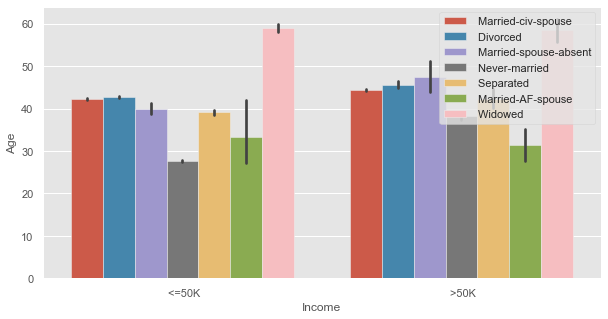

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='Income',y='Age',hue='Marital_status',data=df)
plt.legend(loc = 'upper right')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

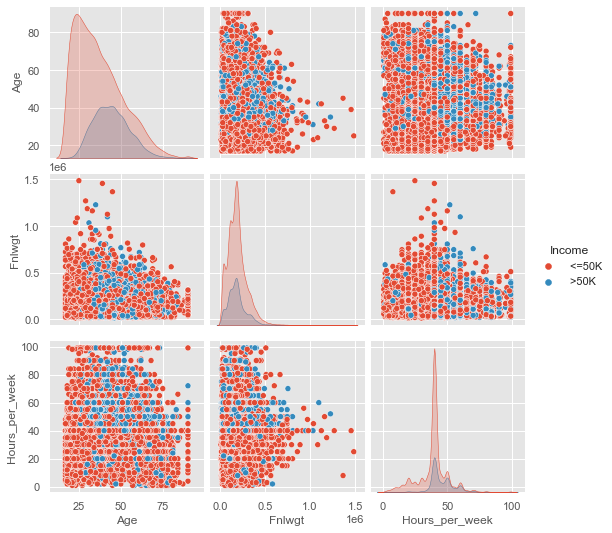

In [25]:
sns.pairplot(df,hue='Income')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### Outlier Treatment

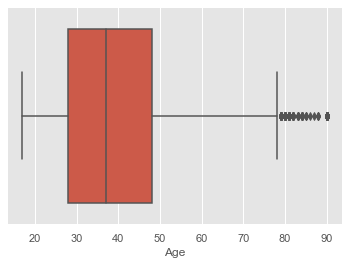

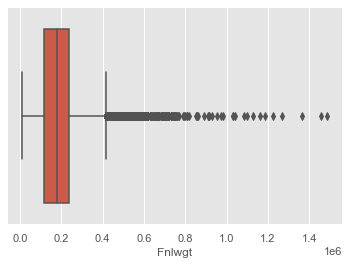

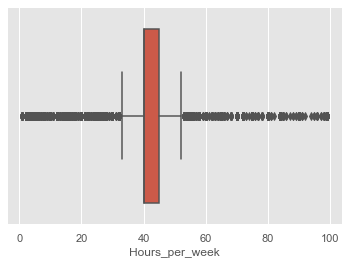

In [26]:
# Check outliers using boxplot
for col in num.columns.difference(['Capital_loss','Capital_gain']):
    sns.boxplot(df[col])
    plt.show()

In [27]:
# use Z-score method
from scipy.stats import zscore
outliers=num[["Age","Fnlwgt","Hours_per_week"]]




z=np.abs(zscore(outliers))
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [28]:
# data loss percentage

loss_percentage= ((df.shape[0]- df_new.shape[0])/df.shape[0])*100
loss_percentage

2.7395577395577395

##### It's acceptable.

In [29]:
# Check Skewness
df_new.skew()

Age               0.470790
Fnlwgt            0.634065
Hours_per_week   -0.338625
dtype: float64

In [30]:
# I'll consider -0.4/0.4 is ok among features skewness and treat the others features.

skew_cols=['Age','Fnlwgt']

In [31]:
#Removing the Skewness

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
df_new[skew_cols] = scaler.fit_transform(df_new[skew_cols].values)

In [32]:
#Checking the skewness again

df_new.skew()

Age              -0.019867
Fnlwgt           -0.034511
Hours_per_week   -0.338625
dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

In [33]:
# Encoding use getdummies and label encoder.
# using label encoder for ordinal and nominal with many records as native_country and itworks good with unbalance techniques
cat_label_encoder=['Workclass','Education','Occupation','Native_country']


lenc = {}

for column in cat_label_encoder:
    lenc[column] = LabelEncoder()
    df_new[column] = lenc[column].fit_transform(df_new[column])

In [34]:
# Encoding using getdummies
nominal_col=['Marital_status','Relationship','Race','Sex','Income']
df_final=pd.get_dummies(df_new,columns=nominal_col, drop_first=True)

In [35]:
# View final dataset
df_final

,Age,Workclass,Fnlwgt,Education,Occupation,Hours_per_week,Native_country,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Income_ >50K
0,0.911939,5,-1.116442,2,3,13,38,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0.106697,3,0.424174,4,5,40,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
2,1.089344,3,0.604200,7,5,40,38,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,-0.732330,3,1.484065,2,9,40,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0.031066,3,1.045582,5,3,40,38,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.828356,3,0.808906,0,12,38,38,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
32556,0.253453,3,-0.210066,4,6,40,38,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
32557,1.368354,3,-0.237780,4,0,40,38,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
32558,-1.353964,3,0.285834,4,0,20,38,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0


In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 31668 entries, 0 to 32559

Data columns (total 24 columns):

 #   Column                                 Non-Null Count  Dtype  

---  ------                                 --------------  -----  

 0   Age                                    31668 non-null  float64

 1   Workclass                              31668 non-null  int32  

 2   Fnlwgt                                 31668 non-null  float64

 3   Education                              31668 non-null  int32  

 4   Occupation                             31668 non-null  int32  

 5   Hours_per_week                         31668 non-null  int64  

 6   Native_country                         31668 non-null  int32  

 7   Marital_status_ Married-AF-spouse      31668 non-null  uint8  

 8   Marital_status_ Married-civ-spouse     31668 non-null  uint8  

 9   Marital_status_ Married-spouse-absent  31668 non-null  uint8  

 10  Marital_status_ Never-married          31668 non-null  

-------------------------------------------------------------------------------------------------------------------------------

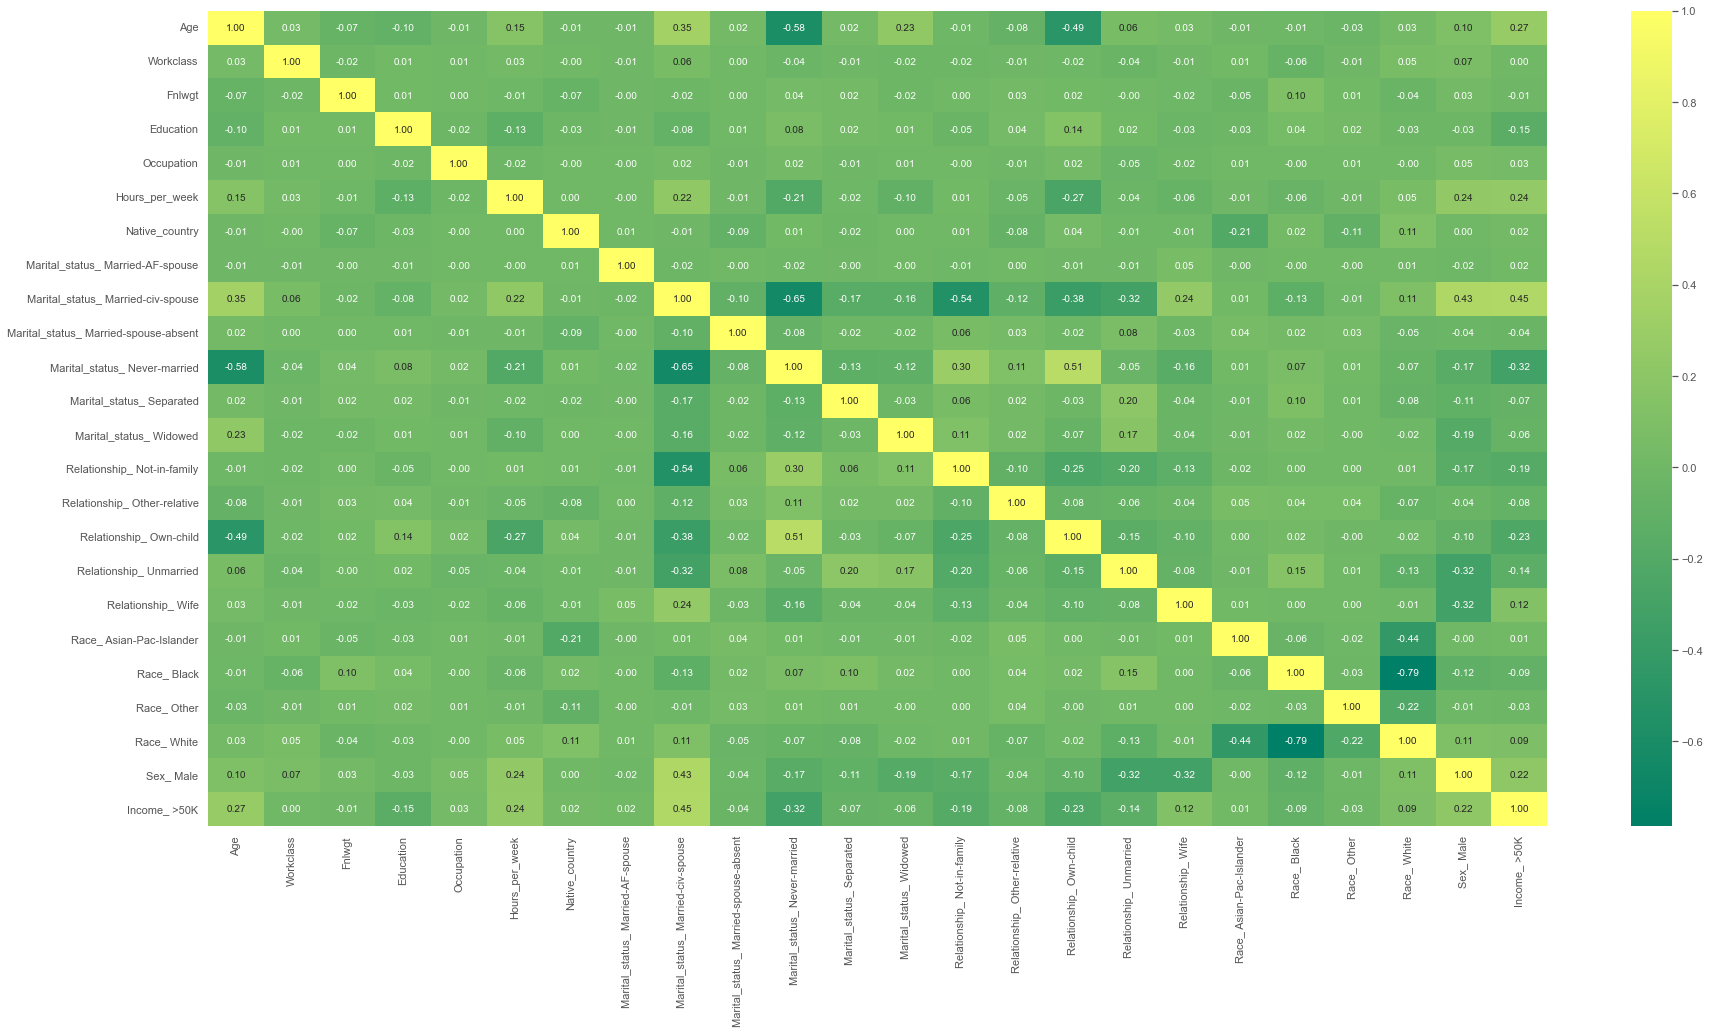

In [37]:
# heatmap correlation
plt.figure(figsize = (30,15))
sns.heatmap(df_final.corr(), annot=True,cmap='summer',fmt='.2f')
plt.show()

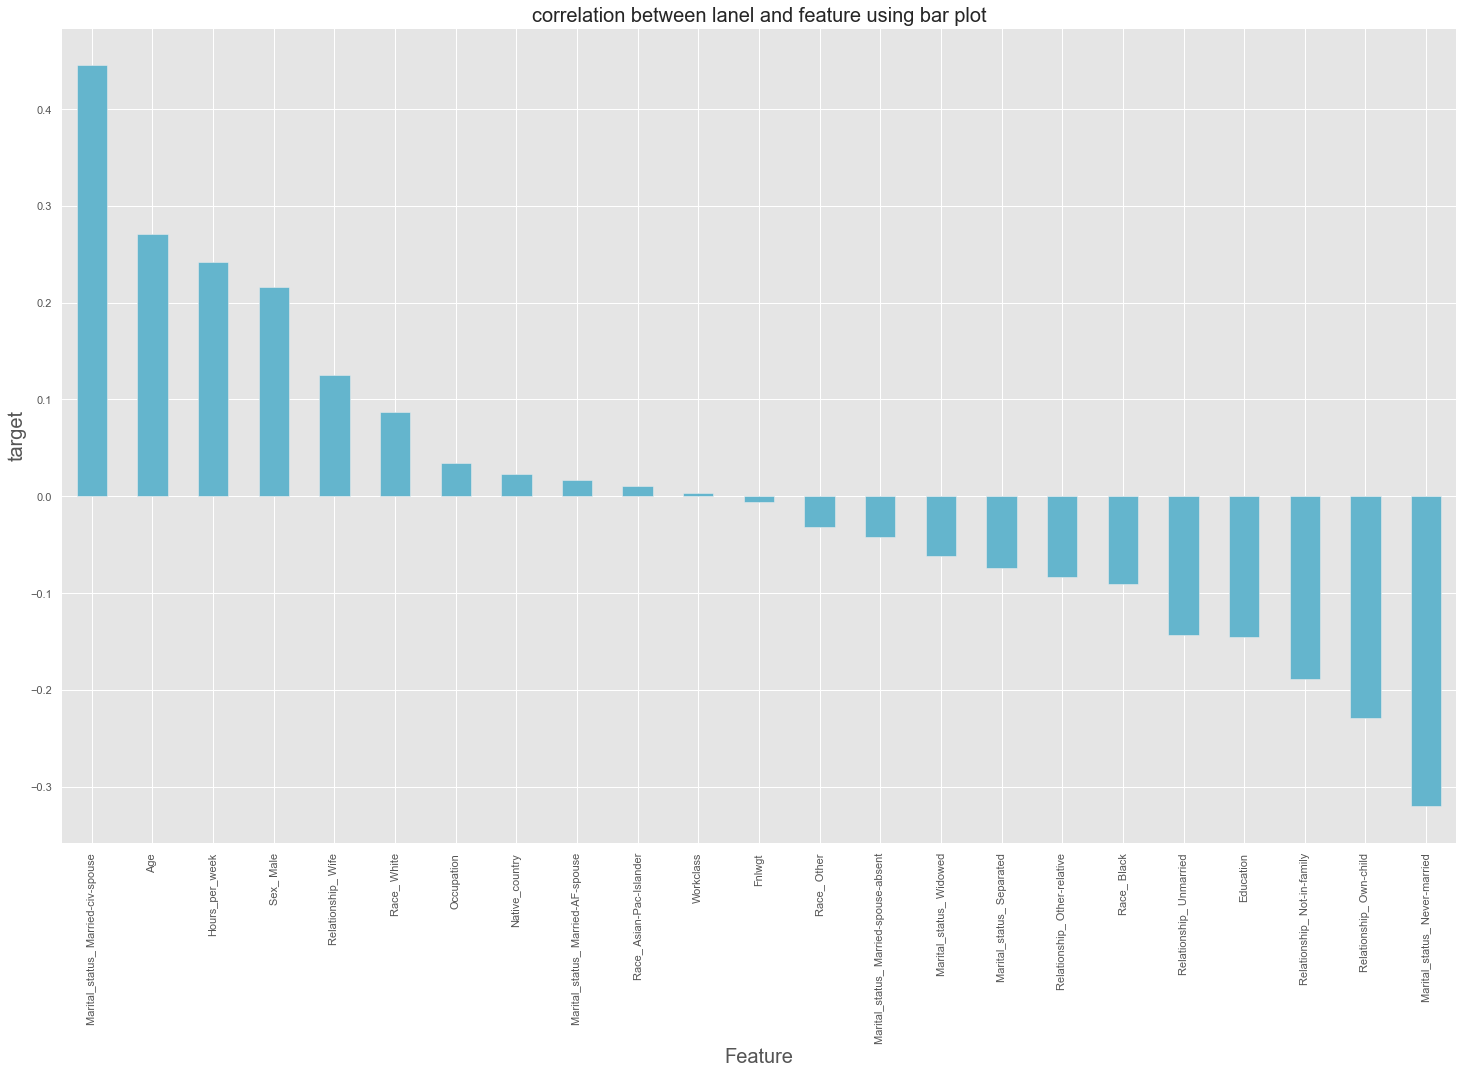

In [38]:
plt.figure(figsize = (25, 15))

df_final.corr()['Income_ >50K'].sort_values(ascending = False).drop(['Income_ >50K']).plot(kind = 'bar', color = 'c')

plt.xlabel('Feature', fontsize = 20)

plt.ylabel('target', fontsize = 20)

plt.title('correlation between lanel and feature using bar plot', fontsize = 20)

plt.show()

In [41]:
df_final.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Occupation', 'Hours_per_week', 'Native_country',
       'Marital_status_ Married-AF-spouse', 'Marital_status_ Married-civ-spouse',
       'Marital_status_ Married-spouse-absent', 'Marital_status_ Never-married',
       'Marital_status_ Separated', 'Marital_status_ Widowed', 'Relationship_ Not-in-family',
       'Relationship_ Other-relative', 'Relationship_ Own-child', 'Relationship_ Unmarried',
       'Relationship_ Wife', 'Race_ Asian-Pac-Islander', 'Race_ Black', 'Race_ Other',
       'Race_ White', 'Sex_ Male', 'Income_ >50K'],
      dtype='object')

In [42]:
# Dropping these feeatures

df_final.drop(['Workclass','Fnlwgt','Race_ Asian-Pac-Islander'],axis=1,inplace=True)

In [43]:
df_final

,Age,Education,Occupation,Hours_per_week,Native_country,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Income_ >50K
0,0.911939,2,3,13,38,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0.106697,4,5,40,38,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,1.089344,7,5,40,38,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,-0.732330,2,9,40,4,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0.031066,5,3,40,38,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.828356,0,12,38,38,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
32556,0.253453,4,6,40,38,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
32557,1.368354,4,0,40,38,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
32558,-1.353964,4,0,20,38,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0


-----------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

###  Treat the imblance target data

In [44]:
#separating the dependent and independent variable for balancing the class
x = df_final.drop('Income_ >50K',axis=1)
y = df_final['Income_ >50K']

In [45]:
# It's time to dela with imbalance of the target withing SMOTE Technique.
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

0    24055

1    24055

Name: Income_ >50K, dtype: int64


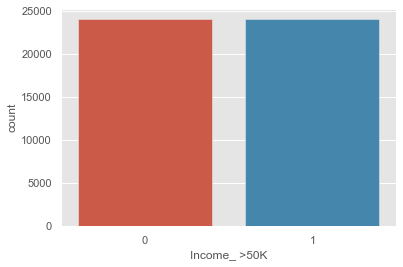

In [46]:
#Checking the count of Attrition

print(y.value_counts())
sns.countplot(y)
plt.show()

------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

### Feature Reduction

##### Weight of evidence & information value

In [47]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [48]:
for col in df_final.columns:
    if col == 'Income_ >50K': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(df_final, col, 'Income_ >50K')
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: Age

IV score: 0.83





WoE and IV for column: Education

IV score: 0.75





WoE and IV for column: Occupation

IV score: 0.66





WoE and IV for column: Hours_per_week

IV score: 0.48





WoE and IV for column: Native_country

IV score: 0.08





WoE and IV for column: Marital_status_ Married-AF-spouse

IV score: 0.00





WoE and IV for column: Marital_status_ Married-civ-spouse

IV score: 1.28





WoE and IV for column: Marital_status_ Married-spouse-absent

IV score: 0.01





WoE and IV for column: Marital_status_ Never-married

IV score: 0.83





WoE and IV for column: Marital_status_ Separated

IV score: 0.05





WoE and IV for column: Marital_status_ Widowed

IV score: 0.03





WoE and IV for column: Relationship_ Not-in-family

IV score: 0.24





WoE and IV for column: Relationship_ Other-relative

IV score: 0.07





WoE and IV for column: Relationship_ Own-child

IV score: 0.66





WoE and IV for column: Relationship_ Unmarried

IV score: 0.1

In [49]:
l_iv=['Age','Education','Occupation','Hours_per_week','Native_country','Marital_status_ Married-civ-spouse',
      'Marital_status_ Never-married','Marital_status_ Separated','Relationship_ Not-in-family','Relationship_ Other-relative',
     'Relationship_ Own-child','Relationship_ Unmarried','Relationship_ Wife','Race_ Black','Race_ White','Sex_ Male']

### RFE

In [51]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=9).fit(x,y)

In [52]:
l2_rfe = x.columns[rfe.get_support()]

In [53]:
l2_rfe

Index(['Age', 'Education', 'Occupation', 'Hours_per_week', 'Marital_status_ Married-civ-spouse',
       'Marital_status_ Never-married', 'Relationship_ Not-in-family', 'Relationship_ Own-child',
       'Relationship_ Unmarried'],
      dtype='object')

### SKB

In [54]:
SKB = SelectKBest(f_classif, k=9).fit(x, y )

In [55]:
l3_skb = x.columns[SKB.get_support()]

In [56]:
l3_skb

Index(['Age', 'Education', 'Hours_per_week', 'Marital_status_ Married-civ-spouse',
       'Marital_status_ Never-married', 'Relationship_ Not-in-family', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Sex_ Male'],
      dtype='object')

In [57]:
list(set((l_iv)+list(l2_rfe)+list(l3_skb)))

['Relationship_ Unmarried',
 'Race_ Black',
 'Marital_status_ Married-civ-spouse',
 'Marital_status_ Never-married',
 'Relationship_ Own-child',
 'Relationship_ Not-in-family',
 'Relationship_ Other-relative',
 'Race_ White',
 'Age',
 'Sex_ Male',
 'Hours_per_week',
 'Education',
 'Marital_status_ Separated',
 'Relationship_ Wife',
 'Native_country',
 'Occupation']

In [63]:
final_list= ['Relationship_ Unmarried',
 'Race_ Black',
 #'Marital_status_ Married-civ-spouse',
 'Marital_status_ Never-married',
 'Relationship_ Own-child',
 'Relationship_ Not-in-family',
 'Relationship_ Other-relative',
 'Race_ White',
 'Age',
 'Sex_ Male',
 'Hours_per_week',
 'Education',
 'Marital_status_ Separated',
 'Relationship_ Wife',
 'Native_country',
 'Occupation']

### Standarization

In [59]:
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x

,Age,Education,Occupation,Hours_per_week,Native_country,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Black,Race_ Other,Race_ White,Sex_ Male
0,0.809137,-1.045171,-0.804160,-2.630353,0.252744,-0.020393,0.835368,-0.092139,-0.5472,-0.146289,-0.142539,-0.491150,-0.14269,-0.339687,-0.280491,-0.244366,-0.274452,-0.075265,0.391503,0.623295
1,-0.064565,-0.219469,-0.299166,-0.152638,0.252744,-0.020393,-1.197077,-0.092139,-0.5472,-0.146289,-0.142539,2.036039,-0.14269,-0.339687,-0.280491,-0.244366,-0.274452,-0.075265,0.391503,0.623295
2,1.001624,1.019084,-0.299166,-0.152638,0.252744,-0.020393,0.835368,-0.092139,-0.5472,-0.146289,-0.142539,-0.491150,-0.14269,-0.339687,-0.280491,-0.244366,3.643620,-0.075265,-2.554259,0.623295
3,-0.974923,-1.045171,0.710824,-0.152638,-5.390482,-0.020393,0.835368,-0.092139,-0.5472,-0.146289,-0.142539,-0.491150,-0.14269,-0.339687,-0.280491,4.092214,3.643620,-0.075265,-2.554259,-1.604378
4,-0.146625,0.193382,-0.804160,-0.152638,0.252744,-0.020393,0.835368,-0.092139,-0.5472,-0.146289,-0.142539,-0.491150,-0.14269,-0.339687,-0.280491,4.092214,-0.274452,-0.075265,0.391503,-1.604378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48105,-0.340879,-1.045171,-0.551663,1.682707,-2.734846,-0.020393,0.835368,-0.092139,-0.5472,-0.146289,-0.142539,-0.491150,-0.14269,-0.339687,-0.280491,-0.244366,-0.274452,-0.075265,0.391503,0.623295
48106,0.143012,-1.045171,-0.804160,0.122664,0.252744,-0.020393,0.835368,-0.092139,-0.5472,-0.146289,-0.142539,-0.491150,-0.14269,-0.339687,-0.280491,-0.244366,-0.274452,-0.075265,0.391503,0.623295
48107,-0.267346,-1.045171,1.215819,0.306199,0.252744,-0.020393,0.835368,-0.092139,-0.5472,-0.146289,-0.142539,-0.491150,-0.14269,-0.339687,-0.280491,-0.244366,-0.274452,-0.075265,0.391503,0.623295
48108,-0.716741,1.431935,-1.056658,-0.152638,0.252744,-0.020393,0.835368,-0.092139,-0.5472,-0.146289,-0.142539,-0.491150,-0.14269,-0.339687,-0.280491,-0.244366,-0.274452,-0.075265,0.391503,0.623295


### VIF check Multicollinarity

In [64]:
x = x[final_list]
y = y

In [65]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [66]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
2,2.830062,Marital_status_ Never-married
3,2.457941,Relationship_ Own-child
4,2.145013,Relationship_ Not-in-family
6,2.110120,Race_ White
1,2.099692,Race_ Black
8,1.844470,Sex_ Male
7,1.617025,Age
0,1.569406,Relationship_ Unmarried
12,1.498880,Relationship_ Wife
5,1.184105,Relationship_ Other-relative


## ML Alogs

In [72]:
# get best random state
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if (roc_auc_score(pred_train,y_train)*100)>=(roc_auc_score(y_test,pred_test)*100):
        print("At random state ",i," The model performs very well")
        print("Training roc_auc_score is :",round(roc_auc_score(y_train,pred_train)*100,1))
        print("Testing roc_auc_score is:",round(roc_auc_score(y_test,pred_test)*100,1),  '\n\n')

At random state  0  The model performs very well

Training roc_auc_score is : 79.0

Testing roc_auc_score is: 79.0 





At random state  1  The model performs very well

Training roc_auc_score is : 78.9

Testing roc_auc_score is: 79.2 





At random state  2  The model performs very well

Training roc_auc_score is : 78.9

Testing roc_auc_score is: 79.1 





At random state  3  The model performs very well

Training roc_auc_score is : 79.0

Testing roc_auc_score is: 78.9 





At random state  4  The model performs very well

Training roc_auc_score is : 78.9

Testing roc_auc_score is: 79.2 





At random state  5  The model performs very well

Training roc_auc_score is : 78.9

Testing roc_auc_score is: 79.2 





At random state  6  The model performs very well

Training roc_auc_score is : 79.1

Testing roc_auc_score is: 78.9 





At random state  7  The model performs very well

Training roc_auc_score is : 78.8

Testing roc_auc_score is: 79.4 





At random state  8  The model pe

#### Split the data

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=13)

### Logistic Regression

In [74]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
score_acc=accuracy_score(y_test,pred_test)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Auc test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))

Roc_Auc train:  0.7905119984665568

Roc_Auc test:  0.7896382514045667

Auc test:  0.7893715790203008

Confusion Matrix:  

 [[5149 2092]

 [ 948 6244]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.84      0.71      0.77      7241

           1       0.75      0.87      0.80      7192



    accuracy                           0.79     14433

   macro avg       0.80      0.79      0.79     14433

weighted avg       0.80      0.79      0.79     14433




### cross-validation

In [79]:
for i in range(3,11):
    cvs=cross_val_score(lr,x,y,cv=i)
    cvs_mean=cvs.mean()
    cvs_std=cvs.std()
    print ("At cv: ",i)
    print ("Cross validation score is : ",cvs_mean*100)
    print ("Cross validation score_std is : ", cvs_std*100)
    print ("accuracy Score is : ",score_acc*100)
    print ("\n")

At cv:  3

Cross validation score is :  78.79861157006077

Cross validation score_std is :  1.482446442468842

accuracy Score is :  78.93715790203008





At cv:  4

Cross validation score is :  78.8672236719128

Cross validation score_std is :  1.3552088115769356

accuracy Score is :  78.93715790203008





At cv:  5

Cross validation score is :  78.9129079193515

Cross validation score_std is :  1.3336419651778852

accuracy Score is :  78.93715790203008





At cv:  6

Cross validation score is :  78.89636137205649

Cross validation score_std is :  1.4271946080492572

accuracy Score is :  78.93715790203008





At cv:  7

Cross validation score is :  78.93162800014102

Cross validation score_std is :  1.4610300971037198

accuracy Score is :  78.93715790203008





At cv:  8

Cross validation score is :  78.92957551621194

Cross validation score_std is :  1.4196349404997688

accuracy Score is :  78.93715790203008





At cv:  9

Cross validation score is :  78.94834115716675

Cross va

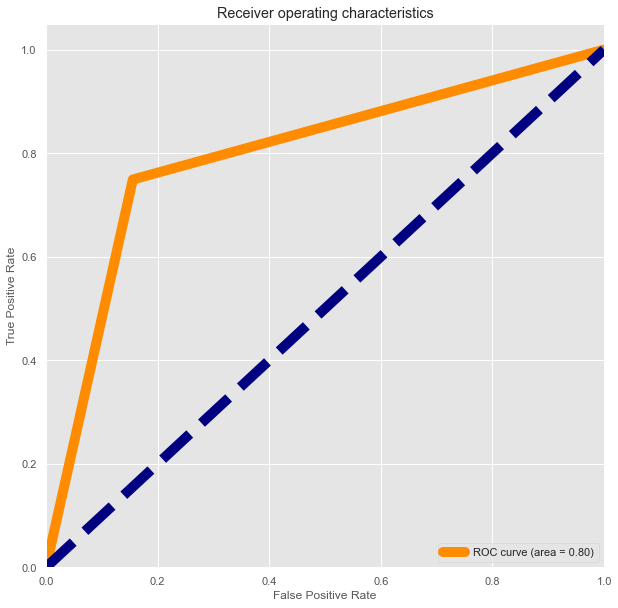

In [80]:
# ROC curve 
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### Decision Tree

In [81]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)
score_train=roc_auc_score(y_train,pred_train)
score_test=roc_auc_score(y_test,pred_test)
print('Roc_Auc Score_train: ',score_train)
print('Roc_Auc Score_test: ',score_test)
print('Confusion Matrix: ' ,'\n','\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(dtc,x,y,cv=9).mean())

Roc_Auc Score_train:  0.9668057411091184

Roc_Auc Score_test:  0.8154696832046041

Confusion Matrix:  

 

 [[5953 1288]

 [1375 5817]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.81      0.82      0.82      7241

           1       0.82      0.81      0.81      7192



    accuracy                           0.82     14433

   macro avg       0.82      0.82      0.82     14433

weighted avg       0.82      0.82      0.82     14433



CV  :  0.8242601518618103


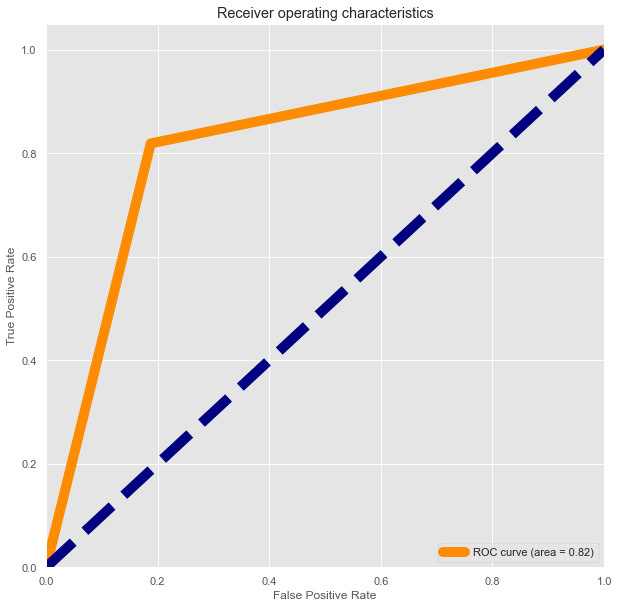

In [82]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### SVM

In [83]:
svc= SVC()
svc.fit(x_train,y_train)
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(svc,x,y,cv=9).mean())

Roc_Auc train:  0.8033424502491375

Roc_Auc test:  0.8016705732973111

Confusion Matrix:  

 [[5286 1955]

 [ 911 6281]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.85      0.73      0.79      7241

           1       0.76      0.87      0.81      7192



    accuracy                           0.80     14433

   macro avg       0.81      0.80      0.80     14433

weighted avg       0.81      0.80      0.80     14433



CV  :  0.8003544746179492


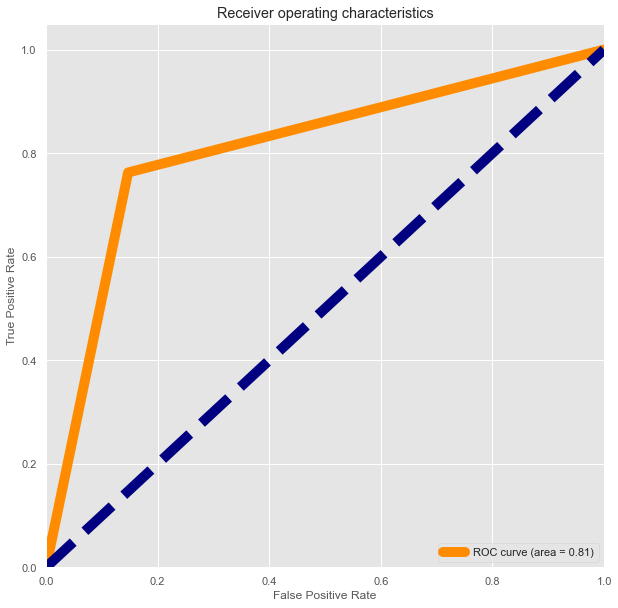

In [84]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### Ensembles Techniques

### Random Forest Classifier

In [85]:
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(rfc,x,y,cv=9).mean())

Roc_Auc train:  0.9667244053229477

Roc_Auc test:  0.8453916614526199

Confusion Matrix:  

 [[6042 1199]

 [1033 6159]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.85      0.83      0.84      7241

           1       0.84      0.86      0.85      7192



    accuracy                           0.85     14433

   macro avg       0.85      0.85      0.85     14433

weighted avg       0.85      0.85      0.85     14433



CV  :  0.851156069038248


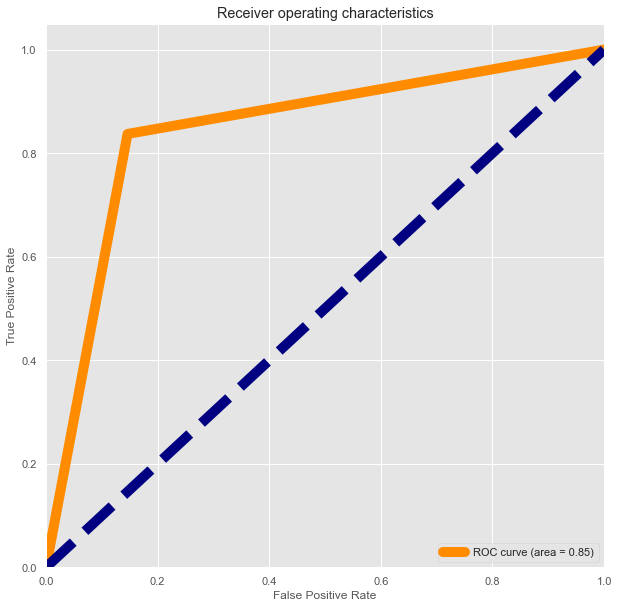

In [86]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### GBC

In [87]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_test=gbc.predict(x_test)
pred_train=gbc.predict(x_train)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(rfc,x,y,cv=9).mean())

Roc_Auc train:  0.8361912573300344

Roc_Auc test:  0.8343746193156969

Confusion Matrix:  

 [[5668 1573]

 [ 820 6372]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.87      0.78      0.83      7241

           1       0.80      0.89      0.84      7192



    accuracy                           0.83     14433

   macro avg       0.84      0.83      0.83     14433

weighted avg       0.84      0.83      0.83     14433



CV  :  0.8501375688928381


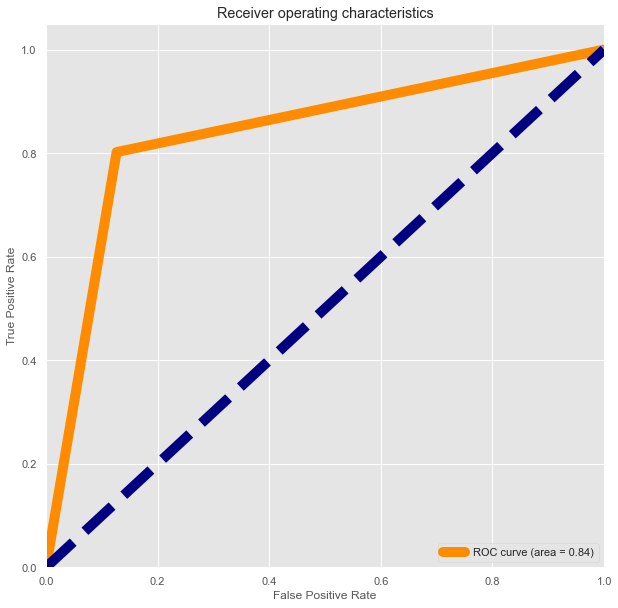

In [88]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### XGboost

In [89]:
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
pred_test=xgb.predict(x_test)
pred_train=xgb.predict(x_train)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(rfc,x,y,cv=9).mean())

Roc_Auc train:  0.9005907330876249

Roc_Auc test:  0.8779793515297807

Confusion Matrix:  

 [[6228 1013]

 [ 749 6443]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.89      0.86      0.88      7241

           1       0.86      0.90      0.88      7192



    accuracy                           0.88     14433

   macro avg       0.88      0.88      0.88     14433

weighted avg       0.88      0.88      0.88     14433



CV  :  0.8500128145140792


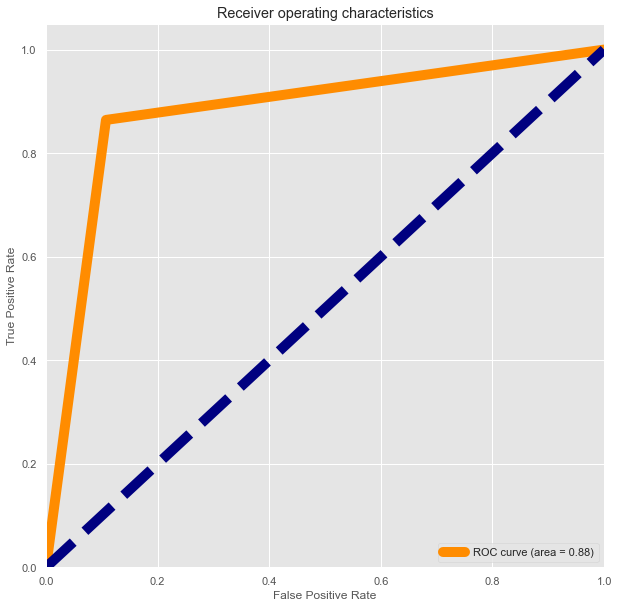

In [90]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

#### Hyperparameter Tuning 

In [91]:
# tunning XGBClassifier

param_xgb={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[100,250,500,700],'max_depth':[5,7,9],'subsample':[0.7,0.9],
           'colsample_bytree':[0.7,0.9],'min_child_weight':range(1,5,2)}

xgb_model=GridSearchCV(XGBClassifier(),param_xgb,cv=9,n_jobs=-1,scoring='roc_auc',verbose=True).fit(x_train,y_train)

Fitting 9 folds for each of 384 candidates, totalling 3456 fits


In [93]:
xgb_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 700,
 'subsample': 0.9}

In [94]:
xgb_model.best_score_

0.9558852062983466

In [95]:
xgb_model_final=XGBClassifier( learning_rate=0.1,n_estimators=700,max_depth=5,subsample=0.9,colsample_bytree=0.7,
                                           min_child_weight=1,random_state=14).fit(x_train,y_train)

In [96]:
train_pred = xgb_model_final.predict(x_train)
test_pred = xgb_model_final.predict(x_test)

In [97]:
print('ROC_AUC_Train: ', roc_auc_score(y_train, train_pred))
print('--------------------------------------------------------------------')
print('ROC_AUC_Test: ', roc_auc_score(y_test, test_pred))

ROC_AUC_Train:  0.9023250776954882

--------------------------------------------------------------------

ROC_AUC_Test:  0.8771234503220522


In [98]:
print(classification_report(y_test, xgb_model_final.predict(x_test)))

              precision    recall  f1-score   support



           0       0.89      0.87      0.88      7241

           1       0.87      0.89      0.88      7192



    accuracy                           0.88     14433

   macro avg       0.88      0.88      0.88     14433

weighted avg       0.88      0.88      0.88     14433




In [99]:
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,test_pred))

Confusion Matrix:  

 [[6274  967]

 [ 807 6385]]


##### The Confusion Matrix show the enchancement done on the tunning model using GridearchCV method.

-------------------------------------------------------------------------------------------------------------------------------

## Saving Model

In [100]:
#Saving the model using .pkl
import joblib
joblib.dump(xgb_model_final,"Census_Income.pkl")

['Census_Income.pkl']

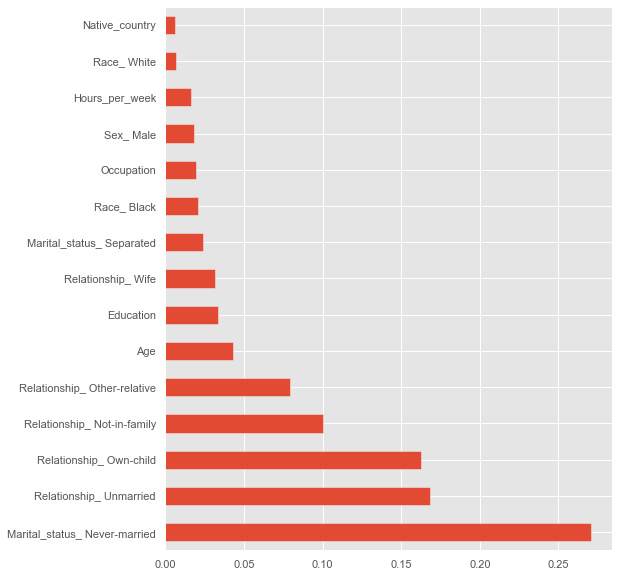

In [101]:
#Checking Feature Importance with XGBoost Model

feat_importances = pd.Series(xgb_model_final.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(8,10))
plt.show()

In [102]:
# load model and get predictions

model=joblib.load("Census_Income.pkl")

#Predict

prediction = model.predict(x_test)

prediction

array([0, 1, 1, ..., 0, 0, 1])

In [103]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,...,14083,14084,14085,14086,14087,14088,14089,14090,14091,14092,14093,14094,14095,14096,14097,14098,14099,14100,14101,14102,14103,14104,14105,14106,14107,14108,14109,14110,14111,14112,14113,14114,14115,14116,14117,14118,14119,14120,14121,14122,14123,14124,14125,14126,14127,14128,14129,14130,14131,14132,14133,14134,14135,14136,14137,14138,14139,14140,14141,14142,14143,14144,14145,14146,14147,14148,14149,14150,14151,14152,14153,14154,14155,14156,14157,14158,14159,14160,14161,14162,14163,14164,14165,14166,14167,14168,14169,14170,14171,14172,14173,14174,14175,14176,14177,14178,14179,14180,14181,14182,14183,14184,14185,14186,14187,14188,14189,14190,14191,14192,14193,14194,14195,14196,14197,14198,14199,14200,14201,14202,14203,14204,14205,14206,14207,14208,14209,14210,14211,14212,14213,14214,14215,14216,14217,14218,14219,14220,14221,14222,14223,14224,14225,14226,14227,14228,14229,14230,14231,14232,14233,14234,14235,14236,14237,14238,14239,14240,14241,14242,14243,14244,14245,14246,14247,14248,14249,14250,14251,14252,14253,14254,14255,14256,14257,14258,14259,14260,14261,14262,14263,14264,14265,14266,14267,14268,14269,14270,14271,14272,14273,14274,14275,14276,14277,14278,14279,14280,14281,14282,14283,14284,14285,14286,14287,14288,14289,14290,14291,14292,14293,14294,14295,14296,14297,14298,14299,14300,14301,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311,14312,14313,14314,14315,14316,14317,14318,14319,14320,14321,14322,14323,14324,14325,14326,14327,14328,14329,14330,14331,14332,14333,14334,14335,14336,14337,14338,14339,14340,14341,14342,14343,14344,14345,14346,14347,14348,14349,14350,14351,14352,14353,14354,14355,14356,14357,14358,14359,14360,14361,14362,14363,14364,14365,14366,14367,14368,14369,14370,14371,14372,14373,14374,14375,14376,14377,14378,14379,14380,14381,14382,14383,14384,14385,14386,14387,14388,14389,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399,14400,14401,14402,14403,14404,14405,14406,14407,14408,14409,14410,14411,14412,14413,14414,14415,14416,14417,14418,14419,14420,14421,14422,14423,14424,14425,14426,14427,14428,14429,14430,14431,14432
Predicted,0,1,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0,0,1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1,0